### 다중회귀모델 (Multiple Regression Model)
- 여러개의 특성(독립변수 = 항목 = 컬럼 = 변수 = 퓨처)을 사용한 선형회귀
- 특성이 많을수록, 복잡도가 높아짐
- 1개의 특성은 선형회귀모델이 '직선'을 학습한다면
- 2개이상의 특성으로는 선형회귀모델이 '평면'을 학습하게 됨
### 다중회귀모델 공식(방정식)
- y = a * 특성1 + b * 특성2 + c * 특성3...+ y절편

#### 데이터 준비하기
- 구글드라이브 > 데이터셋 > 머신러닝 > data > 농어.csv

In [103]:
import pandas as pd

file = './data/03_농어의_길이_높이_두께_데이터.csv'
df = pd.read_csv(file)
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


#### 사용할 데이터
- 훈련데이터(독립변수) : 깊이, 높이, 두께
- target데이터(종속변수) : 무게
- 새로 추가할 데이터 : (길이*높이)
- 모든 작업은 사이킷런에서 제공하는 함수 이용
#### 특성공학
- 기존의 특성을 이용해서 '새로운 특성(항목)'을 만들어내는 작업

In [104]:
## 데이터프레임을 2차원으로 바꾸기
# 데이터프레임은 2차원
# to_numpy()
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [105]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
    1000.0, 1000.0])
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [106]:
from sklearn.model_selection import train_test_split

# 1. 훈련데이터와 테스트데이터 분리하기
train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                      perch_weight,
                                                                      random_state=42)

In [107]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [134]:
#### Poly 예시로 든거임

### 객체생성
poly = PolynomialFeatures()

### 임의값 사용
temp_data = [[2,3]]

### 훈련시키기 : 스스로 특성 조합 찾기
poly.fit(temp_data)

### 찾은 특성 조합으로 데이터 변환하기
print(poly.transform(temp_data))

### 변환기 특성 조합 생성 규칙
# 첫번째 나온 1의 값 : y절편 값 (무조건 첨에 1이 나옴)
# 두번째~세번째 : 자기 자신의 값을 그대로 넣습니다
# 네번째 : 2의 값을 제곱
# 다섯번째 : 2*3
# 여섯번째 : 3의 값을 제공

### y절편 1의 값은 PolynomialFeatures 클래스에서 기본적으로 특성에 추가된 절편값을 무시해버림
# 추가된 y절편 1은 무시해도 되는 값
# 보통 PolynomialFeatures 클래스 생성시에 제외시키는 속성을 사용
# include_bias = False 옵션 사용하면 y절편값 제외

[[1. 2. 3. 4. 6. 9.]]


#### 특성만들기 : 사이킷런의 변환기
- 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 객체를 제공
- 사이킷런에서 제공하는 이런 클래스들을 '변환기'라고 부름
#### 특성 생성 패키지
- 사용되는 패키지 : sklearn.preprocessing
- 사용되는 클래스 : PolynomialFeatures
- 사용되는 함수 : fit(), transform(), fit_transform()
- 특성 생성시 사용하는 데이터는 train_input, test_input 2개
- 훈련에 영향을 미치는 특성(항목)을 스스로 찾아서 생성하는 것이 목적이기 때문에
- target 데이터는 해당사항이 없음 (정답은 변경되면 안됨)

In [109]:
### 특성항목 조합패턴 : 기본적인 조합은 2차원을 사용
# degree = 2


### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용
## 객체생성(모델)
poly = PolynomialFeatures(include_bias=False)

## 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input) 

## 찾은 특성 조합으로 데이터 변환하기
# 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(42, 9) (14, 9)


In [110]:
### 훈련모델이 사용된 조합의 패턴을 가지고 있습니다
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

#### 다중회귀모델 훈련하기 : 훈련모델 생성

In [111]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print("훈련 =",lr.score(train_poly, train_target))
print("테스트 =",lr.score(test_poly, test_target))

훈련 = 0.9903183436982124
테스트 = 0.9714559911594199


In [112]:
### 특성항목 조합패턴 : 기본적인 조합은 2차원을 사용
# degree = 2


### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용
## 객체생성(모델)
poly = PolynomialFeatures(degree = 5, include_bias=False)

## 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input) 

## 찾은 특성 조합으로 데이터 변환하기
# 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [113]:
### 훈련모델이 사용된 조합의 패턴을 가지고 있습니다
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [114]:
### 훈련데이터 학습 다시 하기
lr.fit(train_poly, train_target)

print('훈련 =',lr.score(train_poly, train_target))
print('테스트 =',lr.score(test_poly, test_target))

훈련 = 0.9999999999997439
테스트 = -144.40564427629454


#### 해석
- 테스트 평가결과는 매우 큰 음수값 발생
- 훈련 평가결과는 매우 아름다움
- 이 모델 훈련결과가 좋을수록 테스트결과가 안좋게 나오는 결과를 보일 수 있음
- 과대적합

### 과적합을 줄이는 방법 : 규제
- 규제 : 과대적합이 일어나지 않도록 제어하는 개념
- 계수(기울기 포함)의 값을 줄이는 방법을 규제라고 함
- 규제 개념이 적용된 모델 : 릿지(ridge), 라쏘(lasso) 회귀모델
- 주로 릿지(ridge) 모델을 선호하는 편
### 규제순서
- 1 정규화 : 스케일이 다른 항목들을 표준점수로 동일하게 표준화 함
- 표준점수는 사이킷런에서 제공하는 클래스가 있음
- 2 릿지 및 라쏘 모델 적용
### 릿지(ridge)
- 계수를 제곱한 값을 기준으로 규제를 적용
- 사용패키지 : sklearn.linear_model
- 사용클래스(모델) : Ridge
- 훈련,평가,테스트 : 기존과 동일한 함수 사용
### 라쏘(lasso)
- 계수의 절댓값을 기준으로 규제를 적용
- 사용패키지 : sklearn.linear_model
- 사용클래스 : Lasso
- 훈련,평가,테스트 : 기존과 동일한 함수 사용

#### 정규화

In [115]:
### 정규화(또는 표준화)

### 사용패키지
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import StandardScaler

In [116]:
### 클래스(모델) 생성하기
ss = StandardScaler()

### 스스로 표준점수를 만들어 냄
ss.fit(train_poly, train_target)

### 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 각 데이터는 55개씩
# 평균 및 표준편차 확인
print(ss.mean_, ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

In [117]:
### 릿지모델과 라쏘모델을 이용해서
### 각각 모델에 대한 훈련/테스트 결정계수 확인

from sklearn.linear_model import Lasso

### 객체(모델) 생성
lasso = Lasso()

### 훈련모델 생성
lasso.fit(train_poly, train_target)

### 훈련데이터 결정계수
print('훈련 =',lasso.score(train_poly, train_target))

## 테스트데이터 결정계수
print('테스트 =',lasso.score(test_poly, test_target))

훈련 = 0.9907713826366444
테스트 = 0.9829845191292338


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [118]:
from sklearn.linear_model import Ridge

### 객체(모델) 생성
ridge = Ridge()

### 훈련모델 생성
ridge.fit(train_poly, train_target)

### 훈련데이터 결정계수
print('훈련 =',ridge.score(train_poly, train_target))

## 테스트데이터 결정계수
print('테스트 =',ridge.score(test_poly, test_target))

훈련 = 0.9970689122935321
테스트 = 0.914968643496191


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


#### 규제강도 조절하기
- 릿지 및 라쏘 모델의 경우 규제에 대한 강도를 조절하는 alpha 속성을 사용
- 규제강도 alpha 속성에 들어가는 값을 알려주는 라이브러리는 없음
- 사람이 직접 넣어주어야 함
- 보통 모델 함수 속성 중에 사람이 직접 값을 넣어주는 속성들을 '하이퍼파라미터'라고 함
- 파마리터 또는 하이퍼파라미터 라는 용어를 간혹 쓰는 사람이 있음
#### alpha 조절값 찾는 방법
- 정해진 방법은 없음
- 일반적으로 훈련데이터와 학습데이터로 각각 훈련모델을 생성한 후 평가를 통해
- 결정계수 값을 이용해서 그래프를 그린 후에 훈련데이터와 테스트데이터의 결정계수 값이
- 가장 가까워지는 지점의 x축의 값을 이용해서 alpha 값으로 결정

In [119]:
### alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt

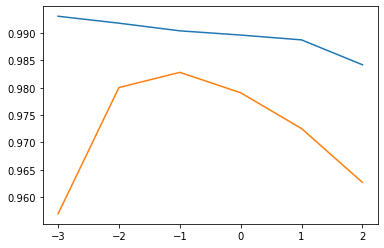

In [120]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha값 설정(x축으로 설정) (범위설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
### 그래프로 시각화
# log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [121]:
# 릿지모델
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.365e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

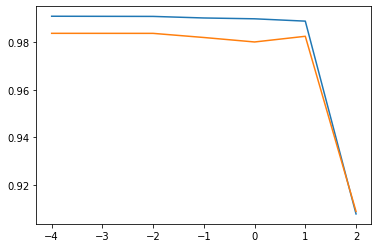

In [122]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha값 설정(x축으로 설정) (범위설정)
alpha_list = [0.0001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 라쏘모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
### 그래프로 시각화
# log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [123]:
# 릿지모델
lasso = Lasso(alpha = alpha)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9078632190121442
0.9089071866576974


### [문제]
- 테스트데이터 : length=50, height=16.49, width=10.6
- 위 다중, 릿지, 라쏘 예측해보기

### ex

##### 데이터 불러오기

In [125]:
file1 = './data/04_(문제)_회귀모델_drinking_water.csv'
df1 = pd.read_csv(file1)
x_data = df1[['친밀도','적절성']]
x_data
y_data = df1[['만족도']]
y_data

,만족도
0,3
1,2
2,4
3,2
4,2
...,...
259,4
260,3
261,4
262,4


##### 데이터 전처리

In [126]:
x_data = x_data.to_numpy()
x_data

array([[3, 4],
       [3, 3],
       [4, 4],
       [2, 2],
       [2, 2],
       [3, 3],
       [4, 4],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 5],
       [4, 4],
       [1, 1],
       [3, 2],
       [2, 2],
       [2, 2],
       [3, 3],
       [2, 3],
       [3, 3],
       [4, 4],
       [3, 2],
       [3, 4],
       [2, 3],
       [4, 4],
       [4, 3],
       [3, 2],
       [2, 3],
       [4, 3],
       [3, 2],
       [3, 2],
       [3, 3],
       [2, 3],
       [3, 4],
       [3, 2],
       [3, 4],
       [3, 1],
       [2, 3],
       [3, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [2, 3],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 3],
       [3, 3],
       [3, 3],
       [3, 2],
       [2, 3],
       [4, 3],
       [3, 3],
       [3, 3],
       [2, 1],
       [4, 3],
       [3, 4],
       [3, 4],
       [4, 5],
       [3, 3],
       [2, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [3, 3],
       [3,

In [127]:
y_data = np.array(y_data)
y_data

array([[3],
       [2],
       [4],
       [2],
       [2],
       [3],
       [4],
       [2],
       [3],
       [3],
       [5],
       [5],
       [1],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [3],
       [4],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [3],
       [4],
       [2],
       [4],
       [1],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [3],
       [1],
       [2],
       [3],
       [4],
       [3],
       [2],
       [2],
       [2],
       [4],
       [3],
       [3],
       [1],
       [3],
       [3],
       [3],
       [5],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [1],
       [4],
       [3],
       [4],
       [4],
       [2],
    

In [128]:
# 1. 훈련데이터와 테스트데이터 분리하기
train_input, test_input, train_target, test_target = train_test_split(x_data,
                                                                      y_data,
                                                                      random_state=42)

##### 특성만들기

In [129]:
# 변수명 : train_poly, test_poly 사용
## 객체생성(모델)
poly = PolynomialFeatures(include_bias=False)

## 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input) 

## 찾은 특성 조합으로 데이터 변환하기
# 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)


(198, 5) (66, 5)


In [130]:
### 훈련모델이 사용된 조합의 패턴을 가지고 있습니다
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

##### 모델만들기

In [135]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print("훈련 =",lr.score(train_poly, train_target))
print("테스트 =",lr.score(test_poly, test_target))

훈련 = 0.6424006605798991
테스트 = 0.6337634370221504


In [157]:
### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용
## 객체생성(모델)
poly = PolynomialFeatures(degree = 5, include_bias=False)

## 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input) 

## 찾은 특성 조합으로 데이터 변환하기
# 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

(198, 20) (66, 20)


In [158]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

In [159]:
### 훈련데이터 학습 다시 하기
lr.fit(train_poly, train_target)

print('훈련 =',lr.score(train_poly, train_target))
print('테스트 =',lr.score(test_poly, test_target))

훈련 = 0.668686596078267
테스트 = -1.0195702935609878
